In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
# Remove unnecessary things
from keras.models import Sequential 
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
# Needed?
#for dirname, _, filenames in os.walk('/data/fruits-360'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [5]:
train_path = '/Users/magnu/Desktop/D7047E_JAME/Project/Ripeness/Fruit_quality_dataset/Train/'
test_path = '/Users/magnu/Desktop/D7047E_JAME/Project/Ripeness/Fruit_quality_dataset/Test/'

In [6]:
# Loads Tensorboard
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' is not recognized as an internal or external command,
operable program or batch file.


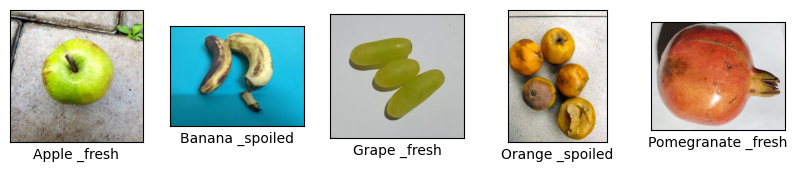

In [7]:
# Insert fruits that you want to inspect
fruits = ['Apple', 'Banana', 'Grape', 'Orange', 'Pomegranate']
# Which image in the folder
fruitnr = 1
ripe=False
Ripe="_fresh"
plt.figure(figsize=(10,10))
for i in range(len(fruits)):
    img = load_img(train_path + "{fruit}{ripe}/{filename}"
                   .format(ripe=Ripe,fruit=fruits[i], filename=os.listdir(train_path +  fruits[i] +Ripe )[fruitnr-1]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(fruits[i] + ' ' + Ripe)
    # Ocillates between Fresh and Spoiled
    if ripe==True:
        Ripe="_fresh"
        ripe=False
    elif ripe==False:
        Ripe="_spoiled"
        ripe=True
plt.show()

In [8]:
img = img_to_array(img)
img.shape

(2509, 3084, 3)

In [1]:
#imported = tf.saved_model.load("/Users/magnu/Desktop/D7047E_test/project/pretrained/")
#imported = tf.saved_model.load('\Users\magnu\Desktop\D7041E_FER\checkpoint')
model = tf.keras.models.load_model('C:/Users/magnu/Desktop/D7047E_test/transfer/TrainedModel/')
model.summary()

NameError: name 'tf' is not defined

In [ ]:
tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics = ["Accuracy", "Recall", "Precision"])

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    vertical_flip=False,
                    zoom_range = 0.3
                    )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(100,100), batch_size = 32,color_mode= "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size=(100,100), batch_size = 32,color_mode= "rgb", class_mode = "categorical")

In [ ]:
# Place to save the model weights
checkpoint_path = "/Users/alexandersellin/Documents/Programmering/Phyton/D7047E/Project/TrainedModel/Model_Ripeness.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=False, save_best_only=True, verbose=1)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
hist = model.fit(train_generator, 
                  epochs = 10,
                  validation_data = test_generator,
                  validation_steps = 50,
                  callbacks=[tensorboard_callback,cp_callback])

In [ ]:
# Launces application 'Tensorboard' that compiles all data from code-run in file path 'logs/fit'
%tensorboard --logdir logs/fit  --port=8008